In [2]:
import os, time, sys
sys.path.append('/home/liuyang/relay-policy-learning/adept_envs')
import torch
import warnings 
warnings.filterwarnings('ignore')
import gym
import gym_minigrid
import flow
import d4rl
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
FontProp = fm.FontProperties(family='serif', weight='semibold', style='normal', size=15)
import matplotlib.pyplot as plt
from matplotlib import gridspec
from tabulate import tabulate

env = gym.make('pen-human-v1')  # 
#print(d4rl.infos.REF_MAX_SCORE[env.spec.id], d4rl.infos.REF_MIN_SCORE[env.spec.id])
print(env.spec.id, env._max_episode_steps)  # 1000
print(len(gym.envs.registry.all()))  # 1344

from IPython.display import display, Latex, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

pen-human-v1 100
333


In [7]:
from termcolor import colored
env = gym.make('hopper-medium-expert-v2')
print(env.observation_space.shape, env.action_space.shape, env.spec.id, type(env.spec.id))

table = []
for i in range(3):
    table.append([234, 424, 45, 0.34, colored('python', 'blue', attrs=['bold'])]) 
print(tabulate(table, headers=["a","true value","φ(x) samples", "φ(x-a) samples", "exp(a) samples"], tablefmt="github"))  # grid

(11,) (3,) hopper-medium-expert-v2 <class 'str'>
|   a |   true value |   φ(x) samples |   φ(x-a) samples | exp(a) samples   |
|-----|--------------|----------------|------------------|------------------|
| 234 |          424 |             45 |             0.34 | python           |
| 234 |          424 |             45 |             0.34 | python           |
| 234 |          424 |             45 |             0.34 | python           |


In [79]:
print(len(gym.envs.registry.all()))

# kitchen-mixed-v0            kitchen_microwave_kettle_bottomburner_light-v0.hdf5
# kitchen-partial-v0          kitchen_microwave_kettle_light_slider-v0.hdf5
# kitchen-complete-v0    mini_kitchen_microwave_kettle_light_slider-v0.hdf5
env = gym.make('relocate-human-v1')
#dataset = env.get_dataset()  # more data
dataset = d4rl.qlearning_dataset(env)  # less data
print(env.spec.id)
for k,v in dataset.items():
    #v.float()
    v = torch.from_numpy(v)
    print(v.shape, v.dtype, k, type(v))
    
#min_, max_ = d4rl.infos.REF_MIN_SCORE[env.spec.id], d4rl.infos.REF_MAX_SCORE[env.spec.id]
#print(min_, max_, min(dataset['rewards']), max(dataset['rewards']), '\n', dataset['rewards'][1000:1030])
#print(dataset['observations'][100:105], '\n\nnext_observations = \n', dataset['next_observations'][100:105])

333


load datafile: 100%|███████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 250.77it/s]

relocate-human-v1
torch.Size([9917, 39]) torch.float32 observations <class 'torch.Tensor'>
torch.Size([9917, 30]) torch.float32 actions <class 'torch.Tensor'>
torch.Size([9917, 39]) torch.float32 next_observations <class 'torch.Tensor'>
torch.Size([9917]) torch.float32 rewards <class 'torch.Tensor'>
torch.Size([9917]) torch.bool terminals <class 'torch.Tensor'>


In [88]:
antmaze= ['antmaze-umaze-v2', 'antmaze-umaze-diverse-v2', 'antmaze-medium-play-v2', 'antmaze-medium-diverse-v2',
                               'antmaze-large-play-v2', 'antmaze-large-diverse-v2']   # state, action  29,8
maze2d = ['maze2d-umaze-v1', 'maze2d-medium-v1', 'maze2d-large-v1']  # state, action  4,2

mujoco = ['halfcheetah-medium-expert-v2', 'walker2d-medium-expert-v2', 'hopper-medium-expert-v2']  # state, action   17,6   17,6   11,3
# _max_episode_steps = 750
flow = ['flow-merge-controller-v0','flow-merge-random-v0','flow-ring-controller-v0', 'flow-ring-random-v0']  # state,action  25,5  3,1 , controller is IDM
kitchen= ['kitchen-complete-v0', 'kitchen-partial-v0', 'kitchen-mixed-v0']   # # state, action  60,9    _max_episode_steps = 280
Adroit = ['relocate-expert-v1', 'door-expert-v1', 'hammer-expert-v1', 'pen-expert-v1']  # state, action  39,30   39,28   46,26   45,24 

for name in kitchen:
    env = gym.make(name)
    print(env.observation_space.shape, env.action_space.shape, env._max_episode_steps, name)


Reading configurations for Franka
Initializing Franka sim
(60,) (9,) 280 kitchen-complete-v0
Reading configurations for Franka
Initializing Franka sim
(60,) (9,) 280 kitchen-partial-v0
Reading configurations for Franka
Initializing Franka sim
(60,) (9,) 280 kitchen-mixed-v0


In [2]:
print(len(gym.envs.registry.all()))
a_dim = []
for name in gym.envs.registry.all():
    try:
        env = gym.make(name.id)
        if env.action_space.shape[0] > 8:
            a_dim.append([env.observation_space.shape, env.action_space.shape, name.id])
            #print(env.observation_space.shape, env.action_space.shape, name.id)
    except Exception as e:
        pass

333


/usr/local/lib/python3.10/site-packages/gym/utils/seeding.py:63: DeprecationWarning: WARN: Function `rng.randint(low, [high, size, dtype])` is marked as deprecated and will be removed in the future. Please use `rng.integers(low, [high, size, dtype])` instead.
  deprecation(
/usr/local/lib/python3.10/site-packages/d4rl/gym_minigrid/minigrid.py:586: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(shape=(grid.width, grid.height), dtype=np.bool)


Reading configurations for Franka
Initializing Franka sim


/usr/local/lib/python3.10/site-packages/gym/core.py:51: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Reading configurations for Franka
Initializing Franka sim
Reading configurations for Franka
Initializing Franka sim
Reading configurations for Franka
Initializing Franka sim
current_dir=/usr/local/lib/python3.10/site-packages/pybullet_envs/bullet
urdf_root=/usr/local/lib/python3.10/site-packages/pybullet_data
urdf_root=/usr/local/lib/python3.10/site-packages/pybullet_data
init
init


GL error 0x500 detected in glGenBuffers
Exception ignored in: <function KukaGymEnv.__del__ at 0x7f32d7769000>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/site-packages/pybullet_envs/bullet/kukaGymEnv.py", line 101, in __del__
    p.disconnect()
pybullet.error: Not connected to physics server.


In [3]:
print(len(a_dim))
a_dim = sorted(a_dim, key=lambda x: -x[1][0])
for i in a_dim:
    print(i)

48
[(39,), (30,), 'relocate-human-v1']
[(39,), (30,), 'relocate-human-longhorizon-v1']
[(39,), (30,), 'relocate-expert-v1']
[(39,), (30,), 'relocate-cloned-v1']
[(39,), (30,), 'relocate-v0']
[(39,), (30,), 'relocate-human-v0']
[(39,), (30,), 'relocate-human-longhorizon-v0']
[(39,), (30,), 'relocate-cloned-v0']
[(39,), (30,), 'relocate-expert-v0']
[(39,), (28,), 'door-human-v1']
[(39,), (28,), 'door-human-longhorizon-v1']
[(39,), (28,), 'door-expert-v1']
[(39,), (28,), 'door-cloned-v1']
[(39,), (28,), 'door-v0']
[(39,), (28,), 'door-human-v0']
[(39,), (28,), 'door-human-longhorizon-v0']
[(39,), (28,), 'door-cloned-v0']
[(39,), (28,), 'door-expert-v0']
[(46,), (26,), 'hammer-human-v1']
[(46,), (26,), 'hammer-human-longhorizon-v1']
[(46,), (26,), 'hammer-expert-v1']
[(46,), (26,), 'hammer-cloned-v1']
[(46,), (26,), 'hammer-v0']
[(46,), (26,), 'hammer-human-v0']
[(46,), (26,), 'hammer-human-longhorizon-v0']
[(46,), (26,), 'hammer-cloned-v0']
[(46,), (26,), 'hammer-expert-v0']
[(45,), (24,)

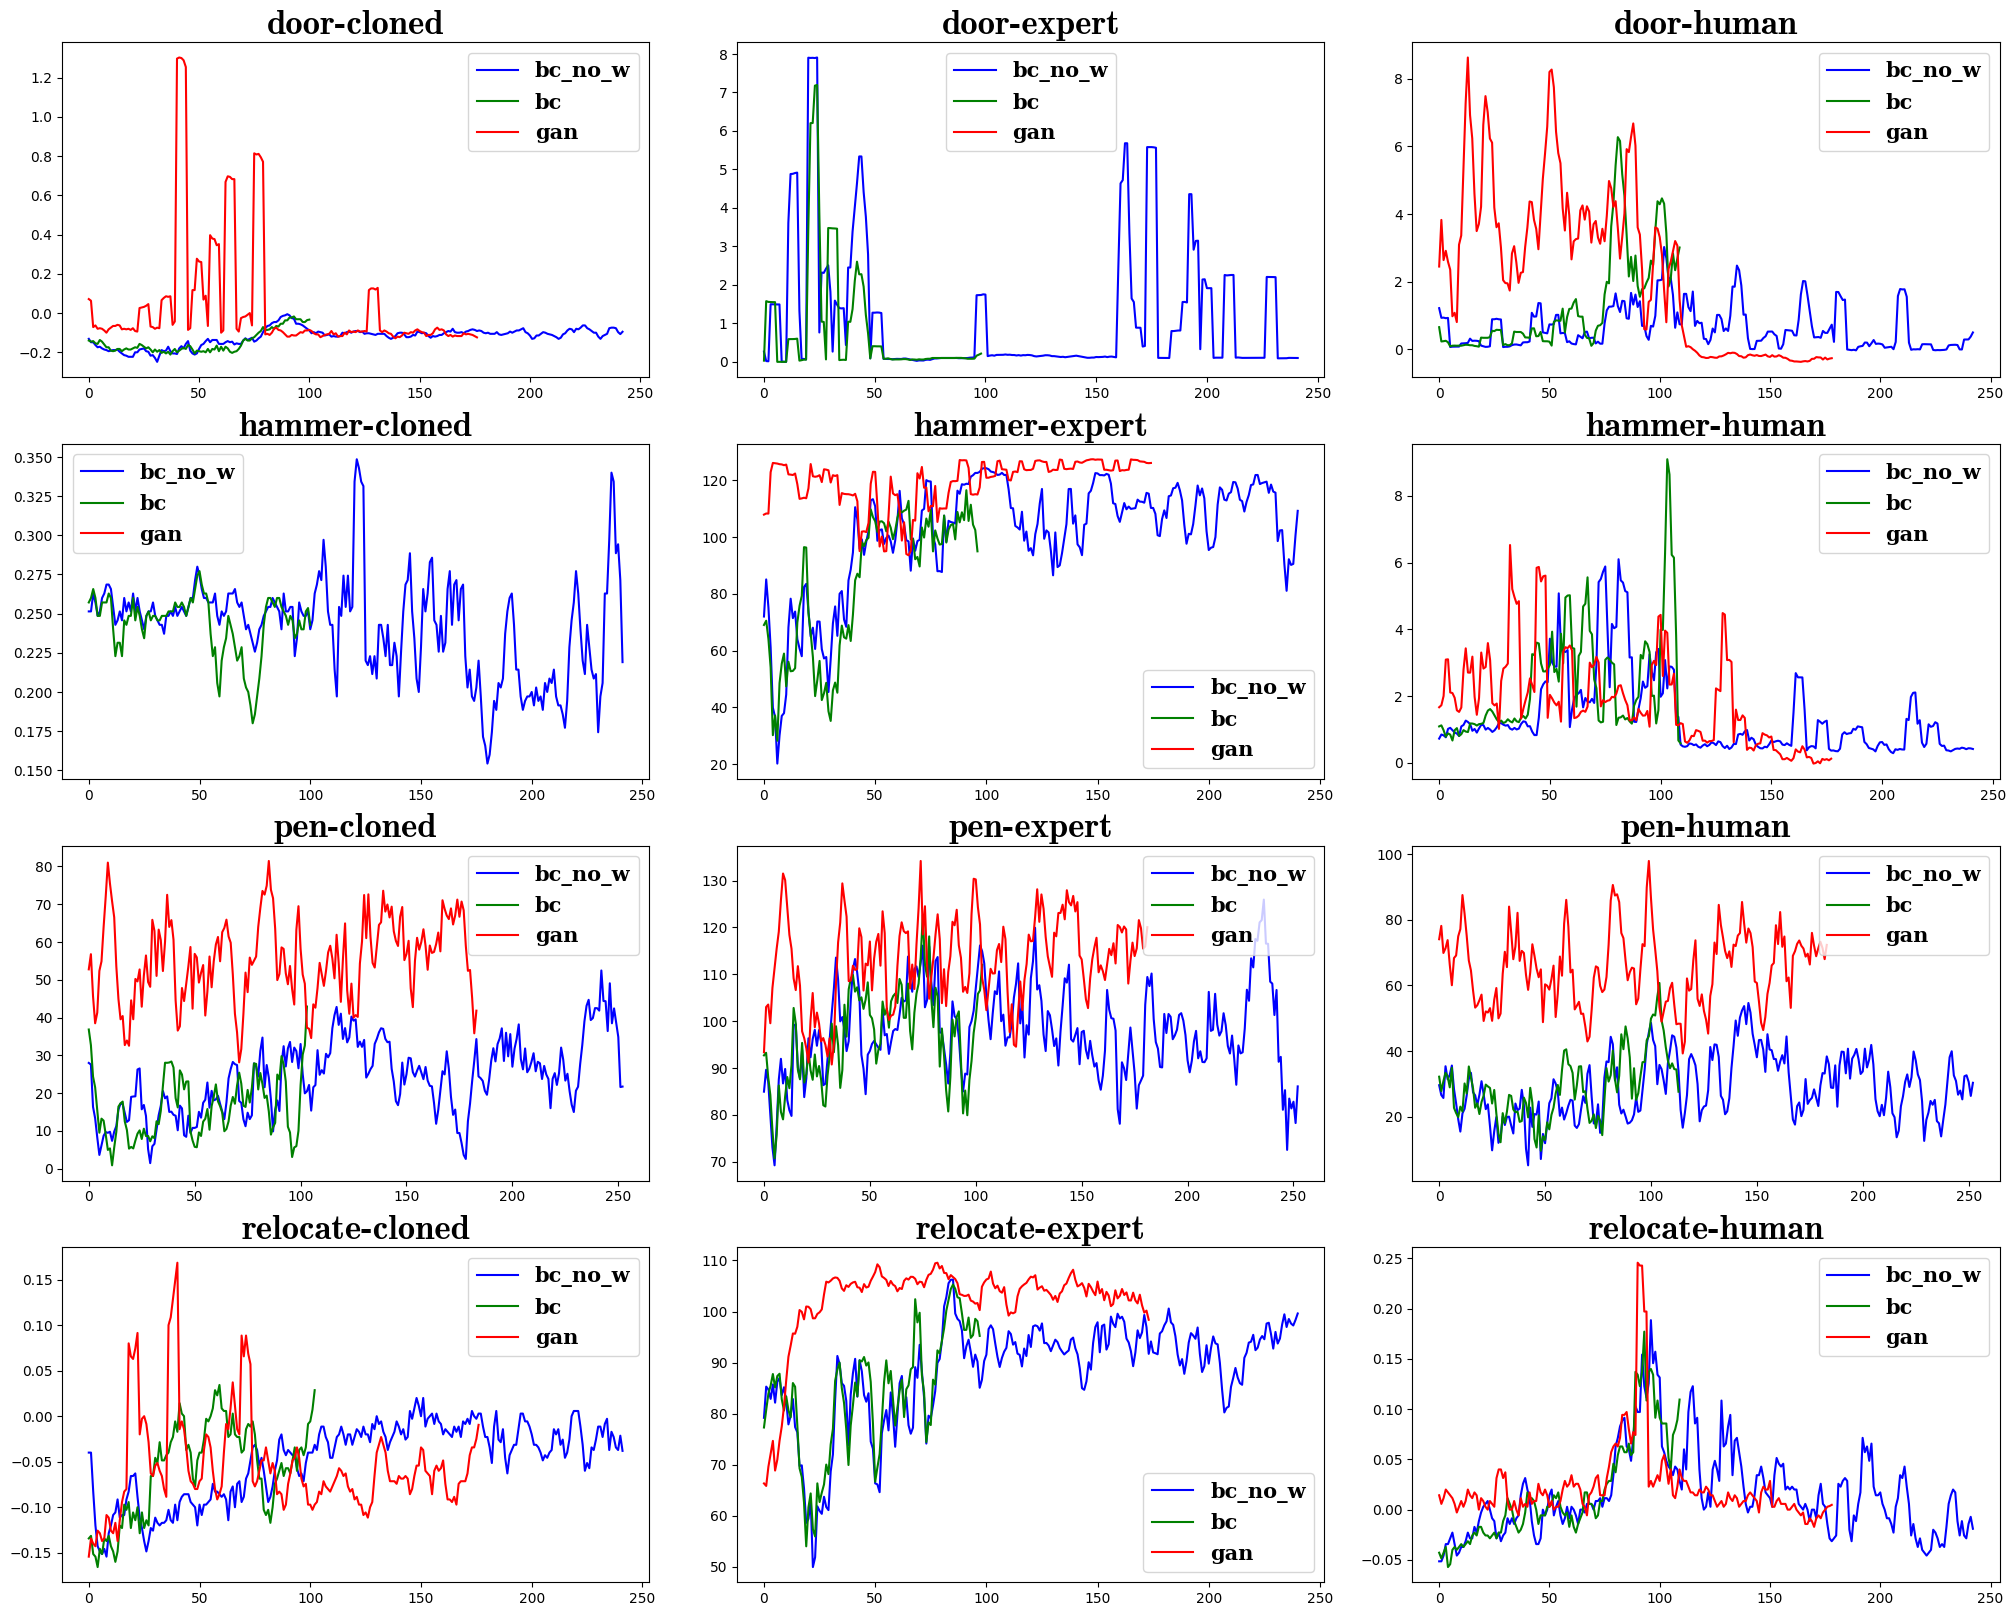

In [79]:
fig, ax = plt.subplots(4, 3, figsize=(25, 20))
gs = gridspec.GridSpec(4, 3, wspace=0.15, hspace=0.2, width_ratios=[1, 1, 1])

color = ['b', 'g', 'r']
dirs = ['gan', 'mmd', 'logs_bc']
paths = ['/mnt/e/OptiPic/logs_pen_no_w_bc', '/mnt/e/OptiPic/logs_bc_adroit', '/mnt/e/OptiPic/gan_adroit']

def to_list(p):
    return p.to_numpy().flatten()
for path, c in zip(paths, color):
    for root, dirs, files in os.walk(path, topdown=False):
        for i,name in enumerate(files):
            scores, stds = [], []
            for line in open(os.path.join(root, name)):
                if 'normalized_scores' in line:
                    s = line.split(':')[1].split(',')[:7]
                    s = list(map(float, s))                    
                    scores.append(np.mean(s))
                    stds.append(np.std(s))
#                 if 'eval' in line:
#                     score = float(line.split()[-1])
#                     scores.append(score)
            scores = pd.DataFrame(scores).rolling(window=5, min_periods=1, center=True).mean()
            #stds = pd.DataFrame(stds).rolling(window=5, min_periods=1, center=True).mean()
            #print(i, len(scores), os.path.join(root, name))
            plt.subplot(gs[i//3, i%3])
            plt.title(name.split('dist_')[1].split('-v')[0], fontname='cmb10', fontsize=25)
            plt.plot(range(len(scores)-25), to_list(scores)[25:], color=c, label=name.split('_dist')[0])  
            #plt.fill_between(range(len(scores)), to_list(scores-stds), to_list(scores+stds), color=c, alpha=0.2)
            plt.legend(prop=FontProp)
            #plt.grid()
            
plt.tight_layout()  # 紧致布局
plt.savefig('pen_no_w_res.png')
plt.show()

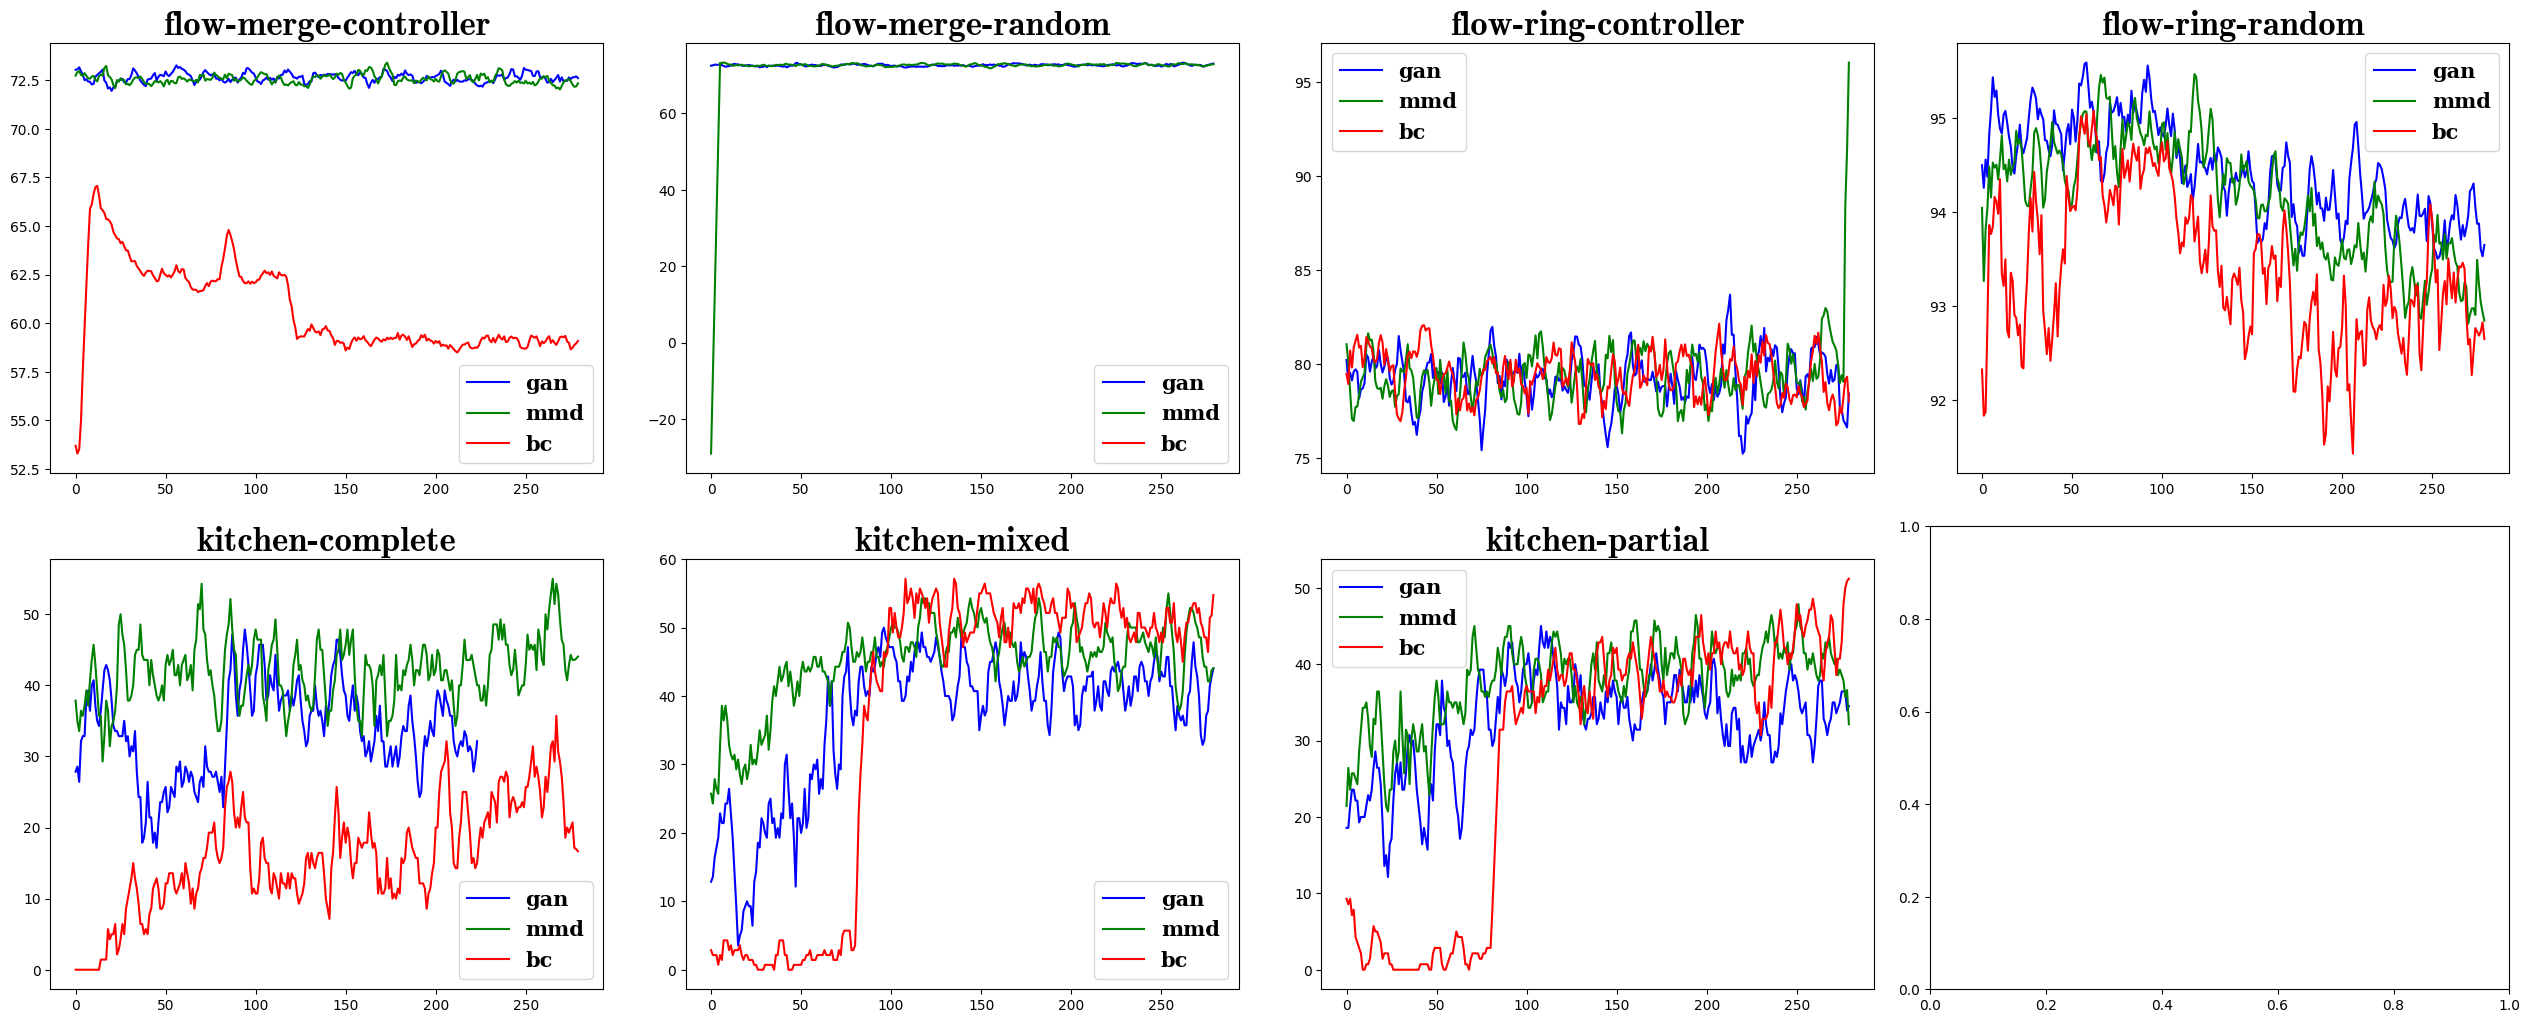

In [27]:
fig, ax = plt.subplots(2, 4, figsize=(25, 10))
gs = gridspec.GridSpec(2, 4, wspace=0.15, hspace=0.2, width_ratios=[1, 1, 1, 1])

color = ['b', 'g', 'r']
dirs = ['gan', 'mmd', 'bc']
paths = ['/mnt/e/OptiPic/logs_flowkit_%s'%d for d in dirs]

def to_list(p):
    return p.to_numpy().flatten()
for path, c in zip(paths, color):
    for root, dirs, files in os.walk(path, topdown=False):
        for i,name in enumerate(files):
            scores, stds = [], []
            for line in open(os.path.join(root, name)):
                if 'normalized_scores' in line:
                    s = line.split(':')[1].split(',')[:7]
                    #print(s)
                    if len(s) < 7: continue
                    s = list(map(float, s))                           
                    scores.append(np.mean(s))
                    stds.append(np.std(s))
#                 if 'eval' in line:
#                     score = float(line.split()[-1])
#                     scores.append(score)
            scores = pd.DataFrame(scores).rolling(window=5, min_periods=1, center=True).mean()
            stds = pd.DataFrame(stds).rolling(window=5, min_periods=1, center=True).mean()
            #print(i, len(scores), os.path.join(root, name))
            plt.subplot(gs[i//4, i%4])
            plt.title(name.split('dist_')[1].split('-v')[0], fontname='cmb10', fontsize=25)
            plt.plot(range(len(scores)-20), to_list(scores[20:]), color=c, label=name.split('_dist')[0])  
            #plt.fill_between(range(len(scores)), to_list(scores-stds), to_list(scores+stds), color=c, alpha=0.2)
            plt.legend(prop=FontProp)
            #plt.grid()
            
plt.tight_layout()  # 紧致布局
plt.savefig('flowkit_res.png')
plt.show()

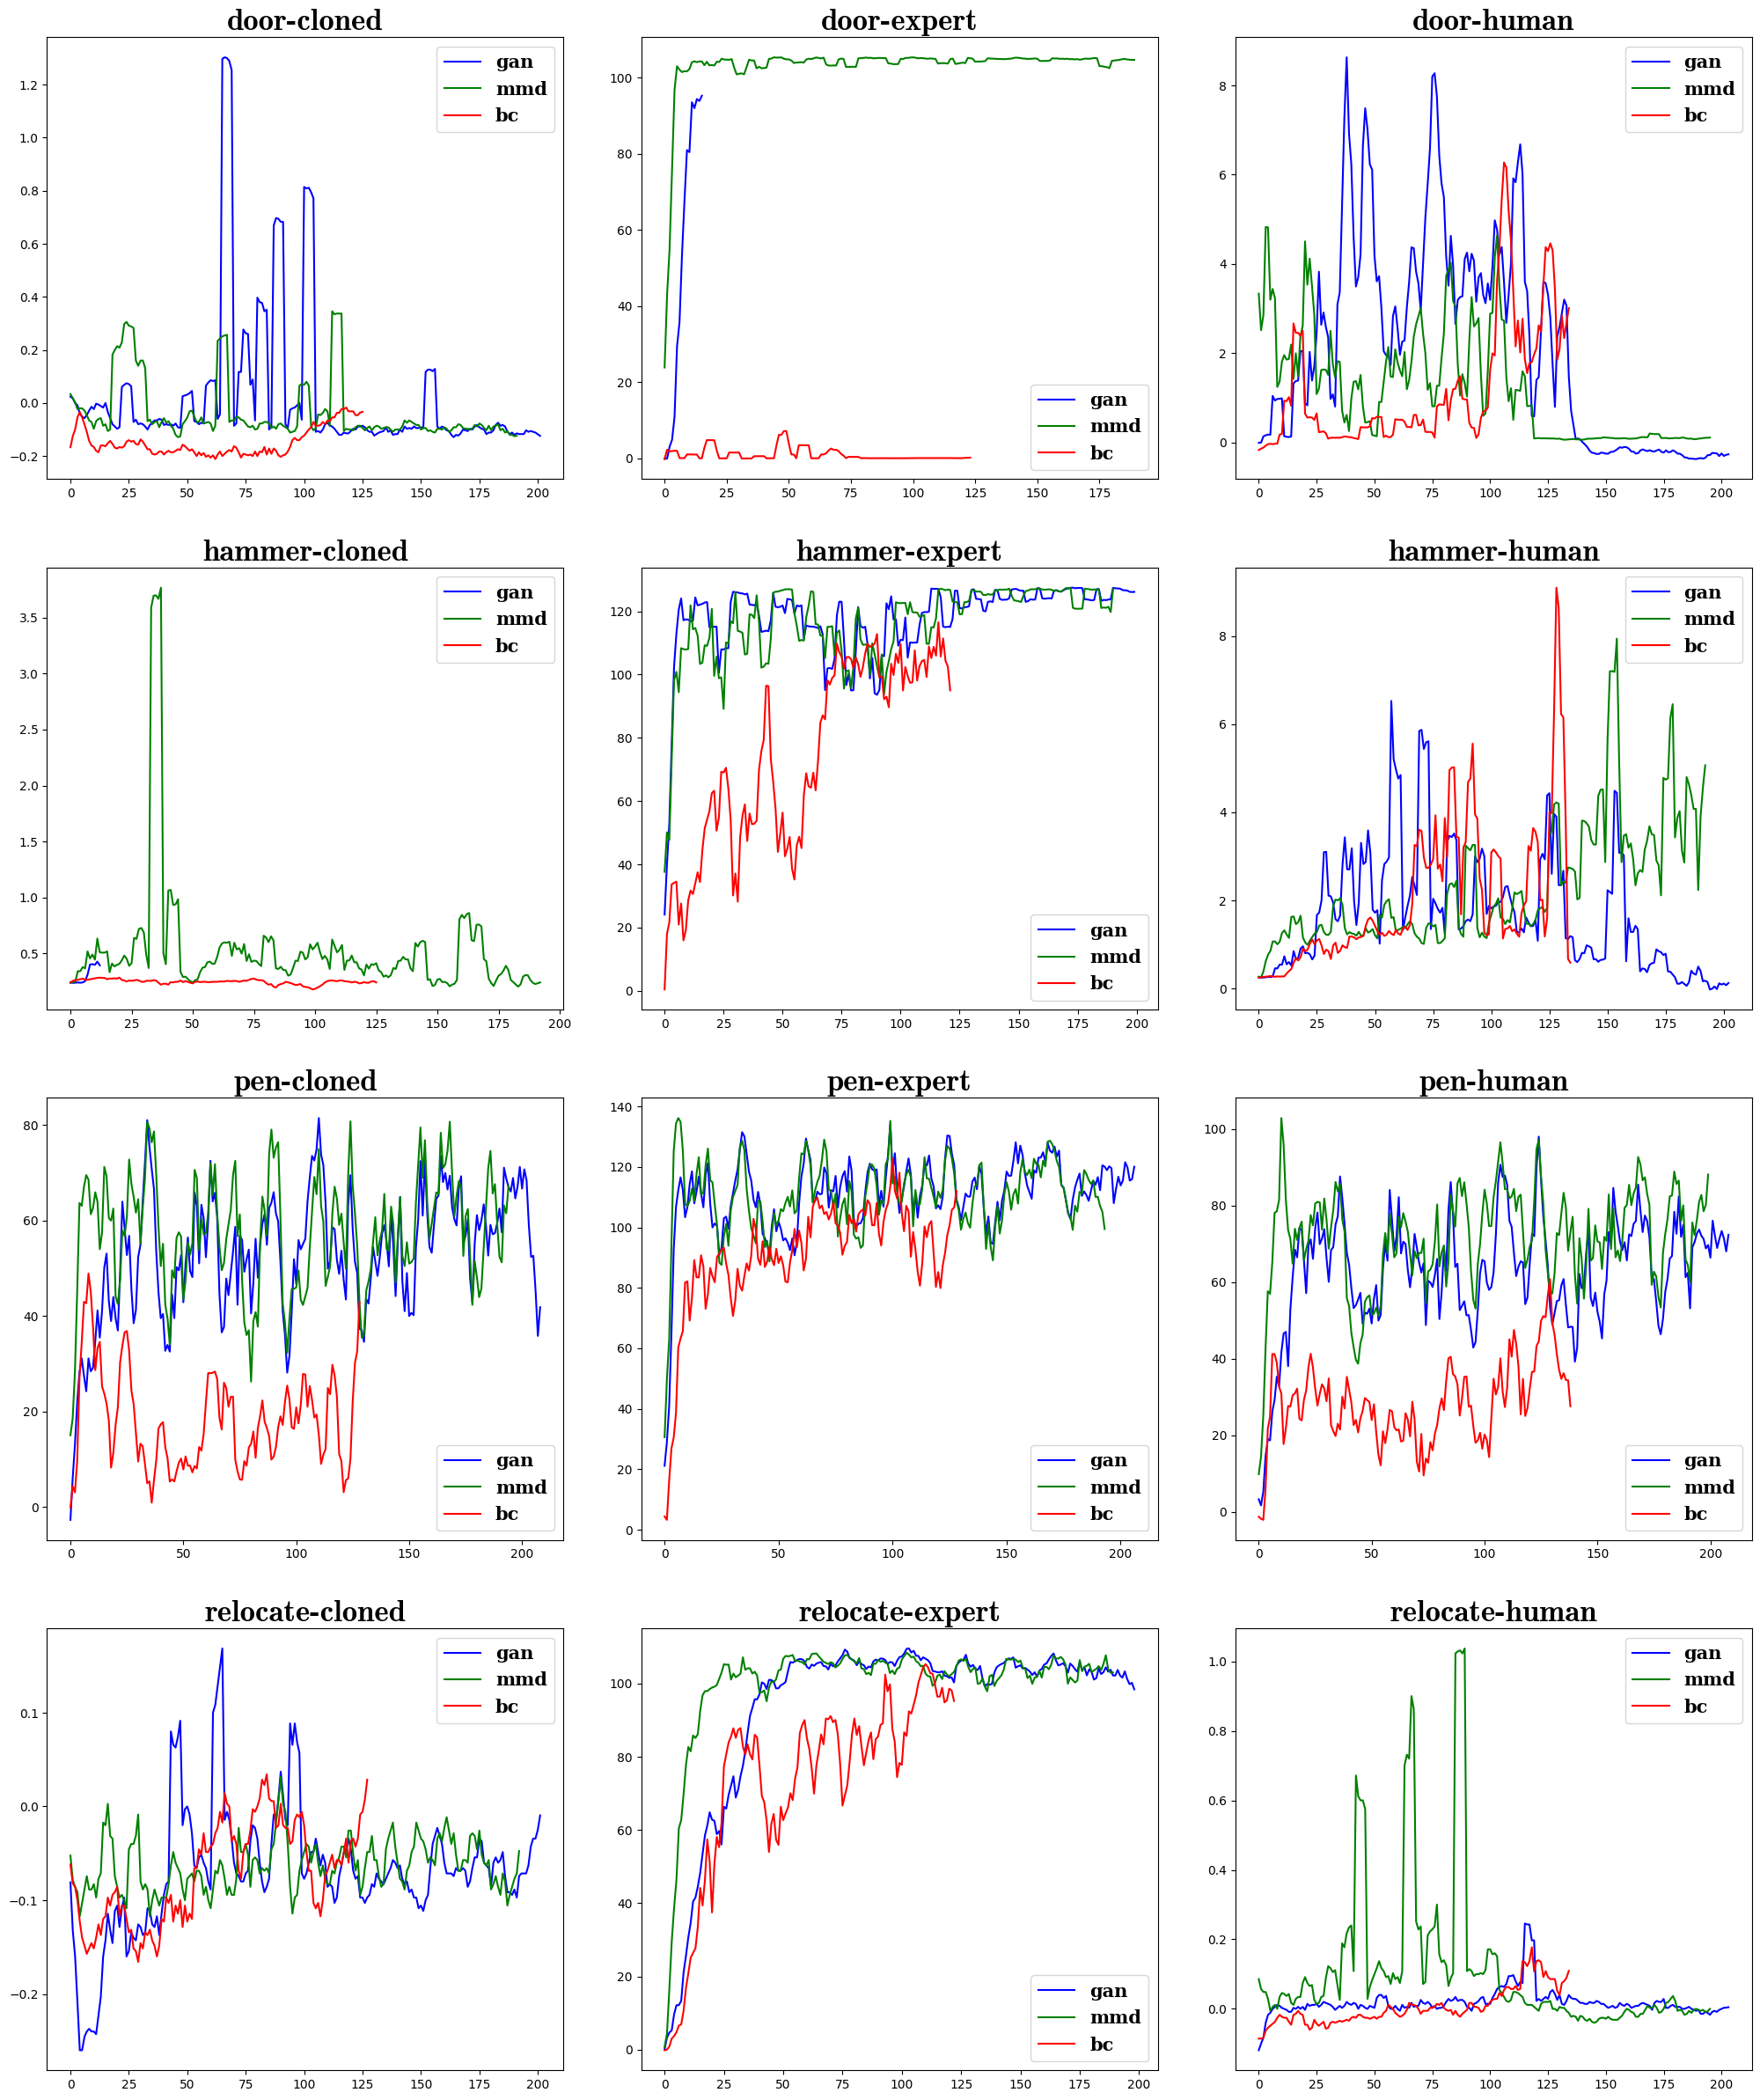

In [6]:
fig, ax = plt.subplots(4, 3, figsize=(25, 30))
gs = gridspec.GridSpec(4, 3, wspace=0.15, hspace=0.2, width_ratios=[1, 1, 1])

color = ['b', 'g', 'r']
dirs = ['gan', 'mmd', 'logs_bc']
paths = ['/mnt/e/OptiPic/%s_adroit'%d for d in dirs]

def to_list(p):
    return p.to_numpy().flatten()
for path, c in zip(paths, color):
    for root, dirs, files in os.walk(path, topdown=False):
        for i,name in enumerate(files):
            scores, stds = [], []
            for line in open(os.path.join(root, name)):
                if 'normalized_scores' in line:
                    s = line.split(':')[1].split(',')[:7]
                    s = list(map(float, s))                    
                    scores.append(np.mean(s))
                    stds.append(np.std(s))
#                 if 'eval' in line:
#                     score = float(line.split()[-1])
#                     scores.append(score)
            scores = pd.DataFrame(scores).rolling(window=5, min_periods=1, center=True).mean()
            stds = pd.DataFrame(stds).rolling(window=5, min_periods=1, center=True).mean()
            #print(i, len(scores), os.path.join(root, name))
            plt.subplot(gs[i//3, i%3])
            plt.title(name.split('dist_')[1].split('-v')[0], fontname='cmb10', fontsize=25)
            plt.plot(range(len(scores)), to_list(scores), color=c, label=name.split('_dist')[0])  
            #plt.fill_between(range(len(scores)), to_list(scores-stds), to_list(scores+stds), color=c, alpha=0.2)
            plt.legend(prop=FontProp)
            #plt.grid()
            
plt.tight_layout()  # 紧致布局
plt.savefig('adroit_res.png')
plt.show()

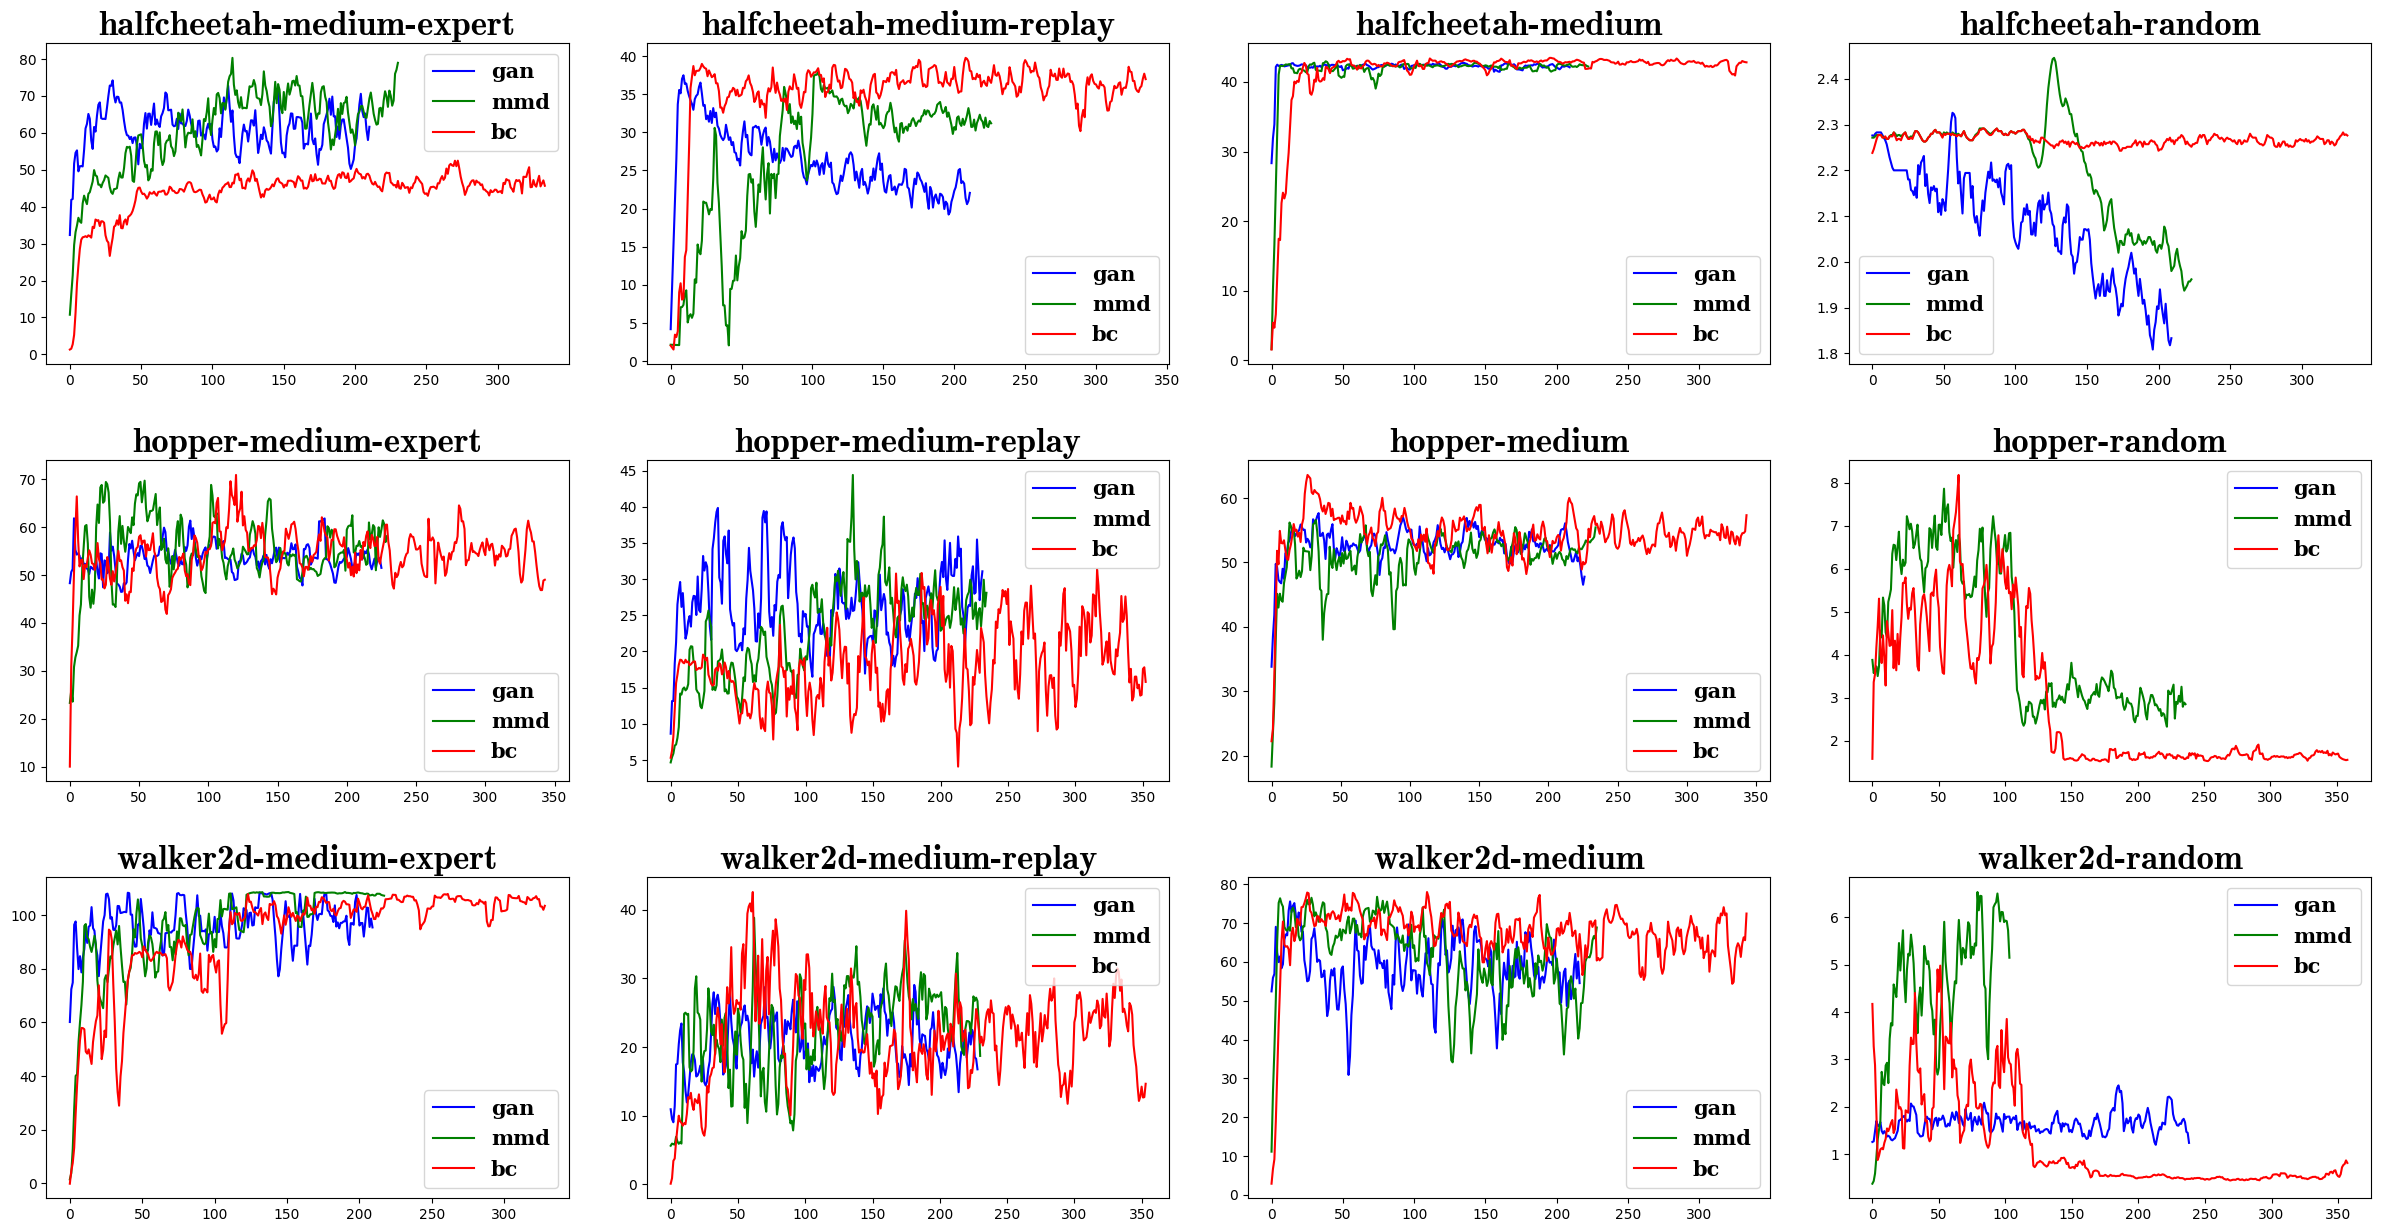

In [27]:
fig, ax = plt.subplots(3, 4, figsize=(30, 15))
gs = gridspec.GridSpec(3, 4, wspace=0.15, hspace=0.3, width_ratios=[1, 1, 1, 1])

color = ['b', 'g', 'r']
dirs = ['gan', 'mmd', 'bc']
paths = ['/mnt/e/OptiPic/%s_mujoco/logs'%d for d in dirs]

def to_list(p):
    return p.to_numpy().flatten()
for path, c in zip(paths, color):
    for root, dirs, files in os.walk(path, topdown=False):
        for i,name in enumerate(files):
            scores, stds = [], []
            for line in open(os.path.join(root, name)):
                if 'normalized_scores' in line:
                    s = line.split(':')[1].split(',')[:7]
                    s = list(map(float, s))                    
                    scores.append(np.mean(s))
                    stds.append(np.std(s))
#                 if 'eval' in line:
#                     score = float(line.split()[-1])
#                     scores.append(score)
            scores = pd.DataFrame(scores).rolling(window=5, min_periods=1, center=True).mean()
            stds = pd.DataFrame(stds).rolling(window=5, min_periods=1, center=True).mean()
            #print(len(scores), os.path.join(root, name))
            plt.subplot(gs[i//4, i%4])
            plt.title(name.split('dist_')[1].split('-v')[0], fontname='cmb10', fontsize=25)
#             if 'bc' in name:
#                 scores = scores - 5
            plt.plot(range(len(scores)), to_list(scores), color=c, label=name.split('_dist')[0])  
            #plt.fill_between(range(len(scores)), to_list(scores-stds), to_list(scores+stds), color=c, alpha=0.2)
            plt.legend(prop=FontProp)
            #plt.grid()
            
plt.tight_layout()  # 紧致布局
plt.savefig('mojoco_res.png')
plt.show()

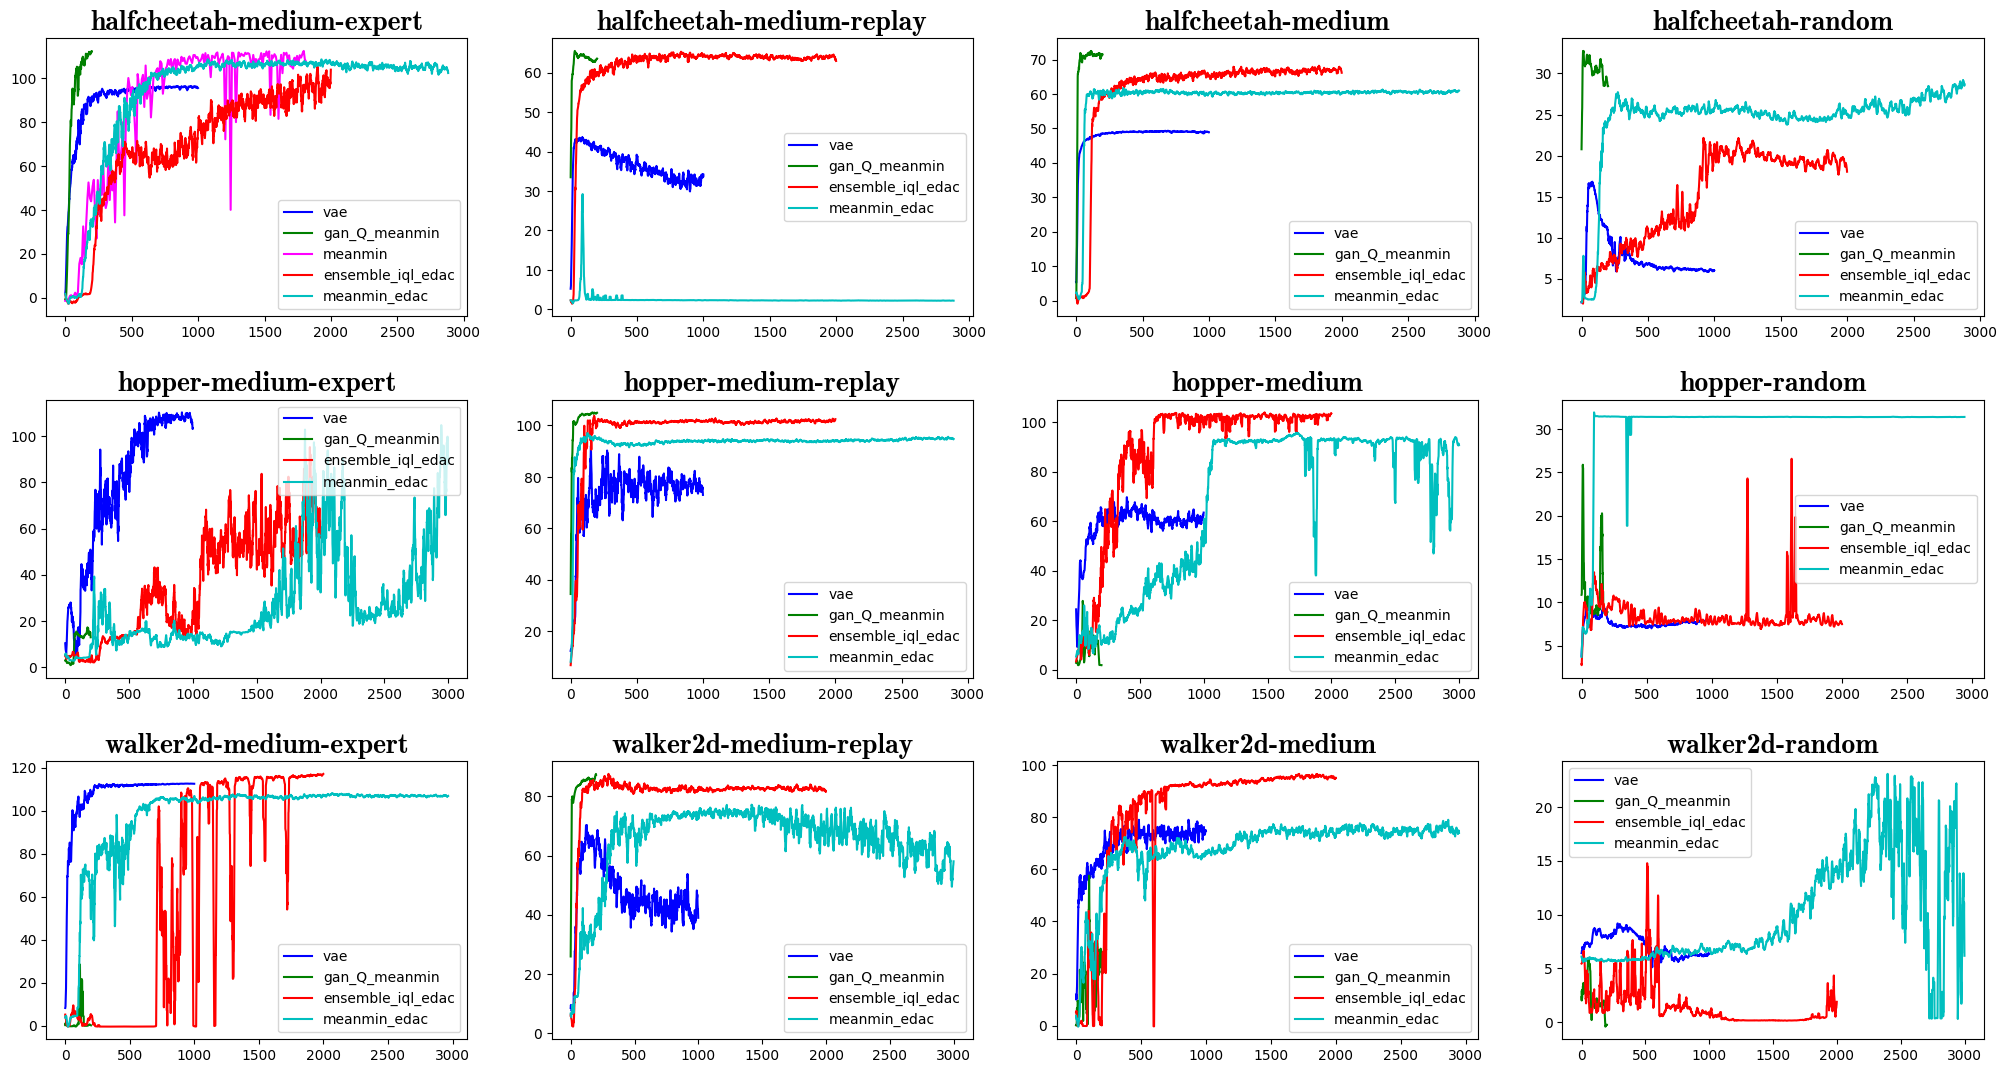

In [4]:
fig, ax = plt.subplots(3, 4, figsize=(25, 13))
gs = gridspec.GridSpec(3, 4, wspace=0.2, hspace=0.3, width_ratios=[1, 1, 1, 1])
color = ['b', 'g', 'r', 'c', 'orange', 'magenta', 'lime']
# EDAC performance
#path = '/mnt/e/OptiPic/logs_mujoco_ensemble_iql_edac'
meanmin = []
for line in open('/mnt/e/OptiPic/meanmin_edac_halfcheetah-medium-expert-v2.txt'):
    score = float(line.split()[-1])
    meanmin.append(score)
meanmin = np.repeat(meanmin, 10)
meanmin = pd.DataFrame(meanmin).rolling(window=10, min_periods=1, center=True).mean()

paths = ['/mnt/e/OptiPic/logs_mujoco_%s'%s for s in ['vae', 'gan_Q_meanmin', 'ensemble_iql_edac', 'meanmin_edac']]
for path, c in zip(paths, color):
    label = path.split('mujoco_')[1]
    for root, dirs, files in os.walk(path, topdown=False):
        #print(root, dirs)
        for i,name in enumerate(files):           
            env = gym.make(name.rsplit('_', 1)[1].split('.')[0])
            max_, min_ = d4rl.infos.REF_MAX_SCORE[env.spec.id], d4rl.infos.REF_MIN_SCORE[env.spec.id]
            scores = []
            for line in open(os.path.join(root, name)):               
                if 'Average Returns' in line:
                    score = float(line.split()[-1])
                    score = (score - min_) / (max_ - min_) * 100
                    scores.append(score)
                if 'normalized_scores' in line:
                    score = float(line.split()[-1])
                    scores.append(score)
            plt.subplot(gs[i//4, i%4])
            if 'halfcheetah-medium-expert-v2' in name and 'ensemble_iql_edac' in root:
                plt.plot(range(len(meanmin)), meanmin.to_numpy().flatten(), color='magenta', label='meanmin')
            
            scores = pd.DataFrame(scores).rolling(window=10, min_periods=1, center=True).mean()
            plt.plot(range(len(scores)), scores.to_numpy().flatten(), color=c, label=label)
            e = name.rsplit('_',1)[1].split('-v')[0]
            plt.title(e, fontname='cmb10', fontsize=20)
            plt.grid()
            plt.legend()
plt.show()


0.0003


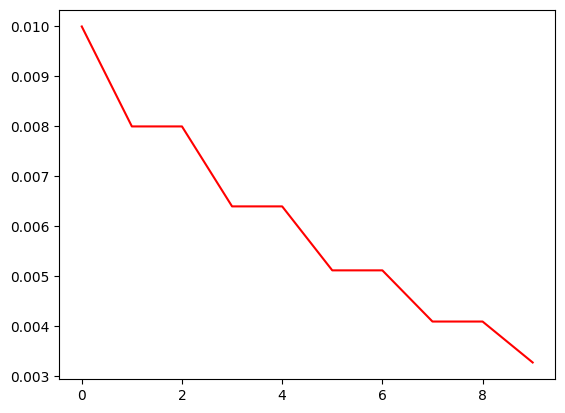

0.0032768000000000007 <class 'list'>


In [67]:
from torch.optim.lr_scheduler import StepLR

a = torch.tensor([1.0,2.0])
q_optimizer = torch.optim.Adam([{'params': a}], lr=3e-4)
for p in q_optimizer.param_groups:
    print(p['lr'])
    p['lr'] *= 0.9
    
class net(torch.nn.Module):
    def __init__(self):
        super(net,self).__init__()
        self.fc = torch.nn.Linear(1,10)
    def forward(self,x):
        return self.fc(x)
    
model = net()
LR = 0.01
optimizer = torch.optim.Adam(model.parameters(),lr = LR)
policy_scheduler = StepLR(optimizer, step_size=2, gamma=0.8)
lr_list = []
for epoch in range(10):
    #optimizer.param_groups[0]['lr'] *= 0.9
    policy_scheduler.step()
    #for p in optimizer.param_groups:
    #    p['lr'] *= 0.9
    #print(policy_scheduler.last_epoch)
    cur_lr = policy_scheduler.get_last_lr()
    lr_list.append(cur_lr)
    #lr_list.append(optimizer.state_dict()['param_groups'][0]['lr'])
plt.plot(range(10),lr_list,color = 'r')
plt.show()

print(policy_scheduler.get_last_lr()[0], type(policy_scheduler.get_last_lr()))

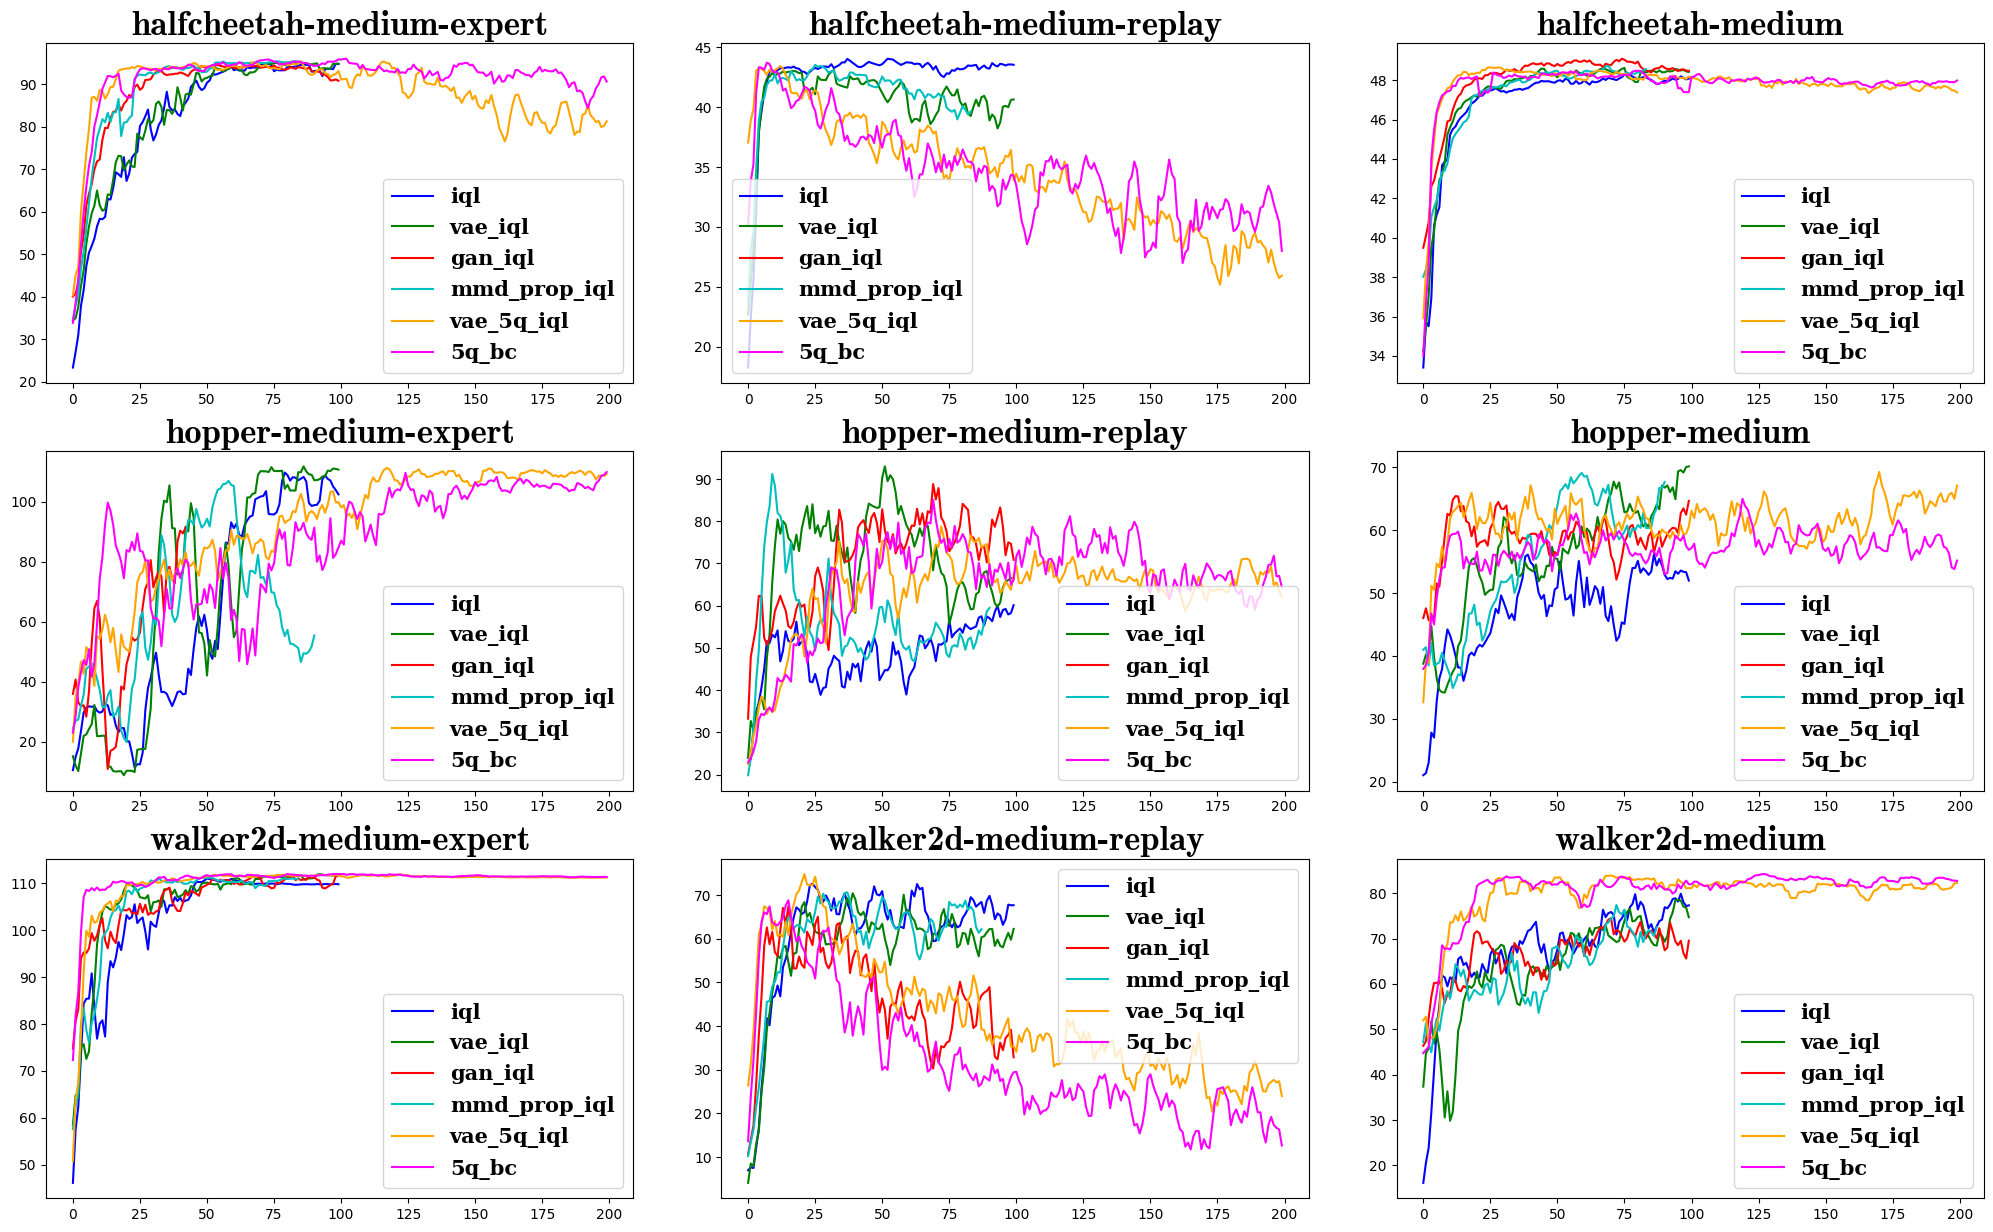

In [4]:
fig, ax = plt.subplots(3, 3, figsize=(25, 15))
gs = gridspec.GridSpec(3, 3, wspace=0.15, hspace=0.2, width_ratios=[1, 1, 1])

color = ['b', 'g', 'r', 'c', 'orange', 'magenta', 'lime']
#dirs = ['no_w_iql', 'iql']
#dirs = ['iql', 'vae_iql', 'gan_prop_iql', 'mmd_prop_iql']
dirs = ['iql', 'vae_iql', 'gan_iql', 'mmd_prop_iql', 'vae_5q_iql', '5q_bc'] # 1003
paths = ['/mnt/e/OptiPic/logs_mujoco_%s'%d for d in dirs]

def to_list(p):
    return p.to_numpy().flatten()
for path, c in zip(paths, color):
    for root, dirs, files in os.walk(path, topdown=False):
        for i,name in enumerate(files):
            scores, stds = [], []
            for line in open(os.path.join(root, name)):
                if 'normalized_scores' in line:
                    s = line.split(':')[1].split(',')[:10]
                    s = list(map(float, s))                    
                    scores.append(np.mean(s))
                    stds.append(np.std(s))
#                 if 'eval' in line:
#                     score = float(line.split()[-1])
#                     scores.append(score)
            if 'maxQ_iql' in path:
                scores = scores[::10]
            scores = pd.DataFrame(scores).rolling(window=5, min_periods=1, center=True).mean()
            stds = pd.DataFrame(stds).rolling(window=5, min_periods=1, center=True).mean()
            #print(i, len(scores), os.path.join(root, name))
            plt.subplot(gs[i//3, i%3])
            plt.title(name.rsplit('_', 1)[1].split('-v')[0], fontname='cmb10', fontsize=25)
            label = path.rsplit('/', 1)[1].split('mujoco_')[1]
            plt.plot(range(len(scores)), to_list(scores), color=c, label=label)  
            #plt.fill_between(range(len(scores)), to_list(scores-stds), to_list(scores+stds), color=c, alpha=0.2)
            plt.legend(prop=FontProp)
            #plt.grid()
            
plt.tight_layout()  
#plt.savefig('IQL_res.png')
plt.show()

In [38]:
#env = gym.make('maze2d-umaze-v1')
env = gym.make('halfcheetah-random-v2')
#env = gym.make('MiniGrid-Dynamic-Obstacles-Random-6x6-v0')
# 17, 6, 1
#state_dim, action_dim, max_action = env.observation_space.shape[0], env.action_space.shape[0], float(env.action_space.high[0])
#state_dim, action_dim = env.observation_space.shape[0], env.action_space.shape[0]

print(env.observation_space.shape, env.action_space.shape, env.action_space.high)

(17,) (6,) [1. 1. 1. 1. 1. 1.]


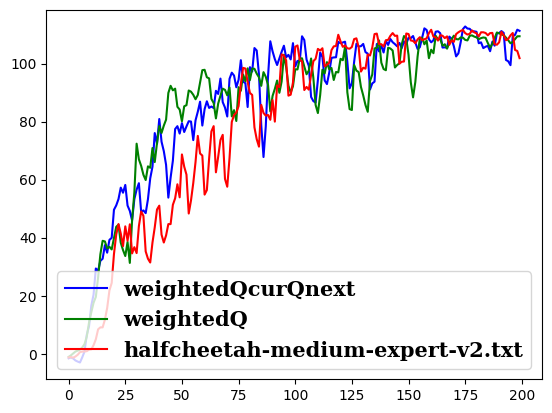

In [12]:
color = ['b', 'g', 'r', 'c', 'orange', 'magenta', 'lime']
#paths = ['/mnt/e/OptiPic/mmd_noise']

paths = ['/mnt/e/OptiPic/%s_halfcheetah-medium-expert-v2.txt'%d for d in ['edac_weightedQcurQnext', 'edac_weightedQ', 'edac']]

def to_list(p):
    return p.to_numpy().flatten()
for path, c in zip(paths, color):
    #for root, dirs, files in os.walk(path, topdown=False):
        #for i,name in enumerate(path):
    scores, stds = [], []
    #c = color[i]
    #for line in open(os.path.join(root, name)):
    for line in open(path):
        if 'normalized_scores' in line:
            s = line.split(':')[1].split(',')[:10]
            s = list(map(float, s))                    
            scores.append(np.mean(s))
            stds.append(np.std(s))
    scores = pd.DataFrame(scores).rolling(window=3, min_periods=1, center=True).mean()
    #stds = pd.DataFrame(stds).rolling(window=5, min_periods=1, center=True).mean()
    label = path.split('_')[1]
    plt.plot(range(len(scores)), to_list(scores), color=c, label=label)  
    #plt.fill_between(range(len(scores)), to_list(scores-stds), to_list(scores+stds), color=c, alpha=0.2)
    plt.legend(prop=FontProp)
    #plt.grid()
plt.show()

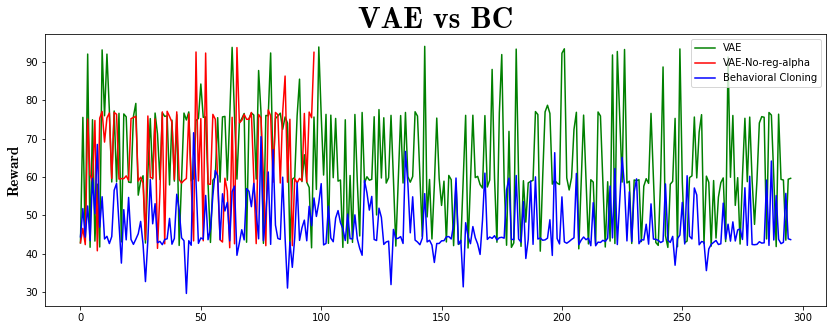

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
fig, ax = plt.subplots(1, 1, figsize=(14, 5))
#gs = gridspec.GridSpec(1, 2, wspace=0.2, hspace=0.3, width_ratios=[1, 1])

path1 = '/mnt/e/OptiPic/vae_halfcheetah-medium-expert-v2.txt'
path2 = '/mnt/e/OptiPic/vae1_no_alpha_halfcheetah-medium-expert-v2.txt'
path3 = '/mnt/e/OptiPic/single_halfcheetah-medium-expert-v2.txt'

scores = []
for line in open(path1):
    if 'eval ' in line:
        score = float(line.split()[1])
        scores.append(score)
#plt.subplot(gs[0, 0])
#scores = pd.DataFrame(scores)
#scores = scores.rolling(window=2, min_periods=1, center=True).mean() 
plt.plot(range(len(scores)), scores, color='g', label='VAE')
#plt.title('vae', fontsize=30, fontname='cmb10')
plt.legend()
#plt.savefig('/mnt/c/Users/liuya/Downloads/vae.png')

scores = []
for line in open(path2):
    if 'eval ' in line:
        scores.append(float(line.split()[1]))
        #print(float(line.split()[1]))
plt.plot(range(len(scores)), scores, color='r', label='VAE-No-reg-alpha')
plt.legend()


scores = []
for line in open(path3):
    if 'eval ' in line:
        score = float(line.split()[1])
        scores.append(score)
#plt.subplot(gs[0, 0])
#scores = pd.DataFrame(scores)
#scores = scores.rolling(window=2, min_periods=1, center=True).mean()
plt.plot(range(len(scores)), scores, color='b', label='Behavioral Cloning')
plt.title('VAE vs BC', fontsize=30, fontname='cmb10')
#plt.xlabel('Iterations', fontsize=15, fontname='cmb10')
plt.ylabel('Reward', fontsize=15, fontname='cmb10')
plt.legend()
#plt.savefig('/mnt/c/Users/liuya/Downloads/bc.png')
plt.show()

61.714178369668076 3.506383869518071 gan_dist_
66.24286597870494 3.6932843902885426 iwae__dist_
62.68540661462071 3.7677057509789 mmd_dist_
64.02283808808288 4.905501144726891 mmd_noreg_dist_


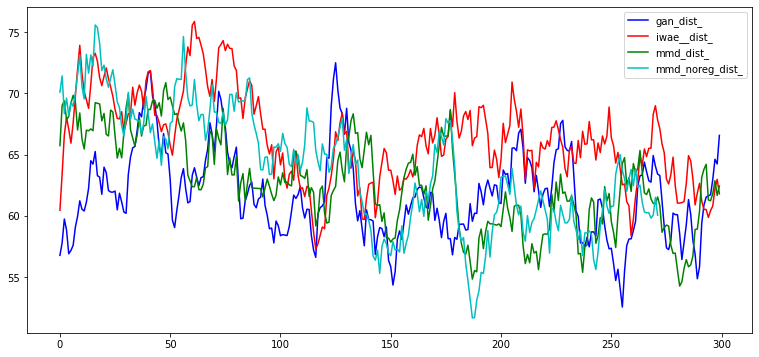

In [5]:
#fig, ax = plt.subplots(4, 3, figsize=(13, 12))
#gs = gridspec.GridSpec(4, 3, wspace=0.2, hspace=0.3, width_ratios=[1, 1, 1])

plt.figure(figsize=(13,6))
color = ['b', 'r', 'g', 'c', 'm']
#path = '/mnt/e/OptiPic/log1-reg_alpha/reg'
path = '/mnt/e/OptiPic/log1-reg_alpha/w_e'
i=0
for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
        if 'plot' in name or 'nowe' in name or 'appro' in name: continue
        scores = []
        for line in open(os.path.join(root, name)):
            if 'eval ' in line:
                score = float(line.split(' ')[1])
                scores.append(score)
        #plt.subplot(gs[i%4, i//4])
        scores = pd.DataFrame(scores).rolling(window=10, min_periods=1, center=True).mean() 
        dist_name = name.split('halfcheetah')[0]
        print(np.mean(scores)[0], np.std(scores)[0], dist_name)
        plt.plot(range(len(scores)), scores.to_numpy().flatten(), color=color[i], label=dist_name)
        #plt.plot(range(len(scores)), scores, color=color[i], label=name.split('halfcheetah')[0])
        plt.legend()
        #plt.title(e, fontname='cmb10')
        i+=1
        
plt.show()

In [163]:
for name in ['halfcheetah-medium-expert-v2', 'walker2d-medium-expert-v2', 'hopper-medium-expert-v2']:
    env = gym.make(name)
    print(env._max_episode_steps)

env = gym.make('halfcheetah-expert-v2')
obs = env.reset()
print(obs)
max_, min_ = d4rl.infos.REF_MAX_SCORE[env.spec.id], d4rl.infos.REF_MIN_SCORE[env.spec.id]
print(env.spec.id, max_, min_)
d = env.get_dataset()

x = np.array(np.where(d['terminals']==False))
print(d['terminals'][:20], x[:20])
#print(d['rewards'][900:1000])

1000
1000
1000
[ 0.05344792  0.0786991  -0.09194712 -0.03896854 -0.06911314 -0.06818251
  0.05494203  0.09293691 -0.05048756 -0.02002048  0.12498279 -0.00435878
  0.09036113 -0.0780328   0.07231335  0.20567996 -0.02146713]
halfcheetah-expert-v2 12135.0 -280.178953


load datafile: 100%|████████████████████████████████████████████████████████████████████| 21/21 [00:01<00:00, 11.80it/s]

[False False False False False False False False False False False False
 False False False False False False False False] [[     0      1      2 ... 999997 999998 999999]]


12135.0 -280.178953 1000
-1.0 1.0 (6,) (17,) 19.97698915488198


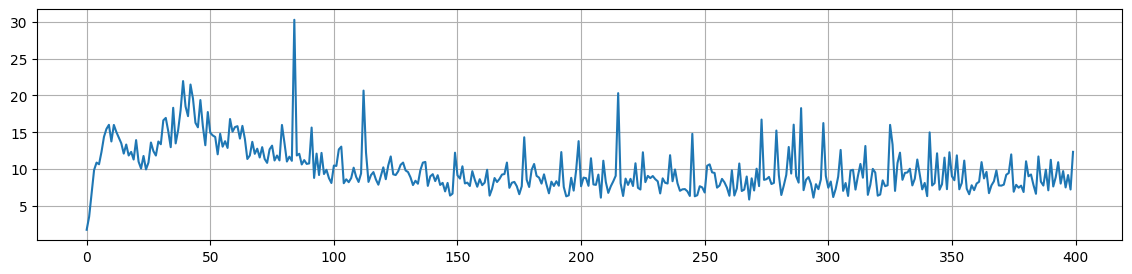

In [135]:
# ['halfcheetah-medium-expert-v2', 'walker2d-medium-expert-v2', 'hopper-medium-expert-v2']
env = gym.make('halfcheetah-medium-expert-v2')
max_, min_ = d4rl.infos.REF_MAX_SCORE[env.spec.id], d4rl.infos.REF_MIN_SCORE[env.spec.id]
ss = (2200 - min_) / (max_ - min_) * 100
print(max_, min_, env._max_episode_steps)
print(env.action_space.low[0], env.action_space.high[0], env.action_space.shape, env.observation_space.shape, ss)

path = '/mnt/c/Users/liuya/Downloads/ensemble_edac_halfcheetah-medium-expert-v2.txt'
#path = '/mnt/e/OptiPic/SAC_10_plr0.0003_qlr0.0003/hopper-medium-replay-v2_0/tmp.txt'
#path = '/mnt/e/OptiPic/tmp'
scores = []
for line in open(path):
    #if 'Average Returns' in line:  
    if 'target_q_var' in line:
        s = line.split()[2]
        scores.append(float(s))
        
#scores = (np.array(scores) - min_) / (max_ - min_) * 100
#scores = pd.DataFrame(scores).rolling(window=10, min_periods=1, center=True).mean() 

fig=plt.figure(figsize=(14,3), facecolor='white')
#plt.plot(range(len(scores)), scores.to_numpy().flatten())
plt.plot(range(len(scores)), scores)
plt.grid()

In [30]:
import torch
# env.reset()
# act = np.random.randn(6) # torch.randn((6,))
# act = env.action_space.sample()
#next_obs, reward, done, info = env.step(act)
#print(act)

d2 = torch.randn((6, 1))
a = torch.randn((6,))
b = torch.randn((6,))
def both():
    return torch.randn((6,)), torch.randn((6,))

z = torch.min(*both())
print(z)
print((a+d2).shape, (a+d2).flatten().shape)
#a = a.unsqueeze(dim=0).repeat(3, 1)
a = torch.randn((6, 5))
#print(a, a.shape)
print(torch.var(a, dim=0).numpy(), torch.min(a, dim=0)[0])


qs_pred_grads = torch.tensor([[1,2,3],[4,5,6],[7,8,9]])
o = torch.einsum('ik,jk->ij', qs_pred_grads, qs_pred_grads)
eye = torch.eye(3)
print(o,eye)

dist = torch.distributions.Normal(torch.tensor([0.0,0.0,0.0]), torch.tensor([1.0,1.0,1.0]))
#print(dist.sample())

tensor([-2.0173, -0.0118, -3.5438, -1.2514, -1.1752, -1.1813])
torch.Size([6, 6]) torch.Size([36])
[2.3893766  1.4990767  0.7411269  0.95930064 0.84858215] tensor([-1.0907, -0.7324, -1.8261, -1.0090, -1.4874])
tensor([[ 14,  32,  50],
        [ 32,  77, 122],
        [ 50, 122, 194]]) tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [27]:
import gym, d4rl
p = '/mnt/e/OptiPic/logs_mujoco_ensemble/ensemble_halfcheetah-medium-expert-v2.txt'
#g = open('/mnt/e/OptiPic/EDAC_halfcheetah-medium-expert-v2_0.txt', 'w')
env = gym.make('halfcheetah-medium-expert-v2')
max_, min_ = d4rl.infos.REF_MAX_SCORE[env.spec.id], d4rl.infos.REF_MIN_SCORE[env.spec.id]

i, score=0, []
# for line in open(p):
#     if 'Average Returns' in line:
#         i += 1
#         s = float(line.split()[-1])
#         ss = (s - min_) / (max_ - min_) * 100
#         g.write(str('%d  %.1f'%(i, ss))+'\n')
    
# g.close()

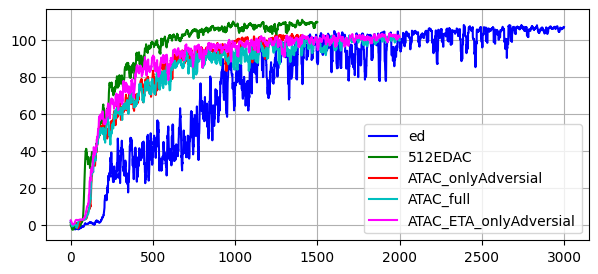

In [28]:
path1 = '/mnt/e/OptiPic/logs_mujoco_ensemble/ensemble_halfcheetah-medium-expert-v2.txt'
path2 = '/mnt/c/Users/liuya/Downloads/512EDAC_halfcheetah-medium-expert-v2.txt'
path3 = '/mnt/c/Users/liuya/Downloads/ATAC_onlyAdversial_halfcheetah-medium-expert-v2.txt'
path4 = '/mnt/c/Users/liuya/Downloads/ATAC_full_halfcheetah-medium-expert-v2.txt'
path5 = '/mnt/c/Users/liuya/Downloads/ATAC_ETA_onlyAdversial_halfcheetah-medium-expert-v2.txt'
colors = ['b', 'g', 'r', 'c', 'magenta', 'orange', 'lime']
labels = ['ed', '512EDAC', 'ATAC_onlyAdversial', 'ATAC_full', 'ATAC_ETA_onlyAdversial']
fig=plt.figure(figsize=(7,3), facecolor='white')
for i,path in enumerate([path1, path2, path3, path4, path5]):
    scores = []
    for line in open(path):
        if 'normalized_scores' in line:
            score = float(line.split('Mean:')[-1])
            scores.append(score)
        if 'Average Returns' in line:
            s = float(line.split()[-1])
            score = (s - min_) / (max_ - min_) * 100
            scores.append(score)
    scores = pd.DataFrame(scores).rolling(window=10, min_periods=1, center=True).mean() 
    plt.plot(range(len(scores)), scores.to_numpy().flatten(), color=colors[i], label=labels[i])
    plt.legend()
plt.grid()
plt.show()
#plt.savefig('/mnt/c/Users/liuya/Downloads/vae.png')

#plt.title('VAE vs BC', fontsize=30, fontname='cmb10')
#plt.xlabel('Iterations', fontsize=15, fontname='cmb10')
#plt.ylabel('Reward', fontsize=15, fontname='cmb10')

In [82]:
start_time = time.time()
s = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))
e = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())
#print(s, '\n', e, ' Cost', time.strftime('%d day, %H:%M:%S', time.gmtime(time.time() - start_time)))

env = gym.make('walker2d-random-v2')  # 'halfcheetah-medium-expert-v2'
d = env.get_dataset()
d['observations'].shape

load datafile: 100%|██████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  4.52it/s]


(1000000, 17)

-10.0 10.0
[4.611807 3.870862 4.546044 4.039492 4.309416]
110758


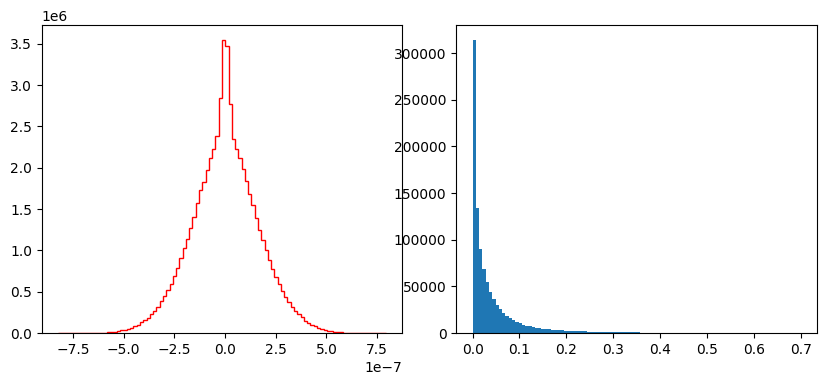

In [139]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, wspace=0.15, hspace=0.2, width_ratios=[1, 1])

state = d['observations'] #[1000:1005]
std = np.std(state, axis=1)
m1, m2 = np.amin(d['observations']), np.amax(d['observations'])
np.set_printoptions(precision=6, suppress=True)
print(m1, m2)
print(np.std(d['observations'][100000:100005], axis=1))
mm = np.amin(np.abs(d['observations']), axis=1)
print(sum(mm<0.0012))
plt.subplot(gs[0, 0])
#plt.plot(range(len(std)), std)
#plt.hist(std, bins=100, density=True, histtype='step', color='b')
noise = np.expand_dims(np.random.normal(scale=10*std), 1)
std_new = np.std(state + noise, axis=1)
plt.hist(std_new-std, bins=100, density=True, histtype='step', color='r')
#plt.plot(range(len(std)), std_new-std)

plt.subplot(gs[0, 1])
plt.hist(mm, bins=100)
plt.show()

In [164]:
import torch.nn.functional as F

a = torch.tensor([[1,2,3.], [2, 2, 2]])
b = torch.tensor([[2,3,4.], [5, 5, 5]])
#a.min(0)[0].mean(dtype=torch.float)
torch.einsum('ik,jk->ij', a, b)
obs = a.unsqueeze(0).repeat(3, 1, 1).reshape(-1, 3)
#torch.min(a, dim=0)[0]
adv = torch.tensor([1, 2, -4, 5., -2])
torch.where(adv > 0, F.elu(adv), torch.exp(adv))

tensor([1.0000, 2.0000, 0.0183, 5.0000, 0.1353])

In [64]:
a = torch.tensor([1,2,3.,4])
b = torch.tensor([1,1,5.,4])
#torch.stack((a,b), dim=0).min(dim=0)[0]
#a + b.unsqueeze(1)
a.tanh()
torch.stack([a]*3, dim=0)
a.unsqueeze(0).repeat((3,1))
torch.linalg.norm(a)

tensor(5.4772)